<a href="https://colab.research.google.com/github/shashankgd/Data-Analysis/blob/master/imagecomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [0]:
import cv2


import os
import numpy as np
import argparse
import imutils
import glob
from matplotlib import pylab as plt

imgs=[]
files = [f for f in os.listdir('.') if os.path.isfile(f)]
print(files)

def showimg(x):
  plt.imshow(x)



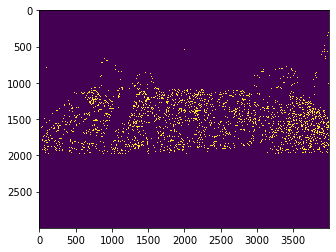

In [3]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-t", "--template", required=True, help="Path to template image")
# ap.add_argument("-i", "--images", required=True,
# 	help="Path to images where template will be matched")
# ap.add_argument("-v", "--visualize",
# 	help="Flag indicating whether or not to visualize each iteration")
# args = vars(ap.parse_args())
 
# load the image image, convert it to grayscale, and detect edges
template = cv2.imread('table1.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
showimg(template)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


table3.jpg (17.2707072, (0, 0), 1.0)
table4.jpg (8.02853696, (0, 0), 1.0)
apple2.jpg does not match
threshold1.jpg.jpg (10.89814528, (0, 0), 1.0)
apple5.jpg does not match
table2.jpg (6.1334752, (0, 0), 1.0)
apple1.jpg does not match
table1.jpg (234.80295424, (0, 0), 1.0)
threshold2.jpg.jpg (12.81554688, (0, 0), 1.0)
apple4.jpg does not match


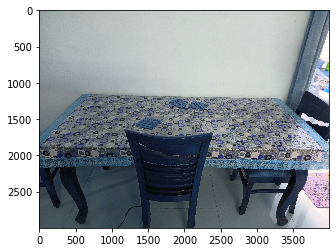

In [4]:

# loop over the images to find the template in
for imagePath in os.listdir('.'):
  threshold = []
  if os.path.isfile(imagePath):
    # load the image, convert it to grayscale, and initialize the
    # bookkeeping variable to keep track of the matched region
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found = None
  
    # loop over the scales of the image
    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
      # resize the image according to the scale, and keep track
      # of the ratio of the resizing
      resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
      r = gray.shape[1] / float(resized.shape[1])
  
      # if the resized image is smaller than the template, then break
      # from the loop
      if resized.shape[0] < tH or resized.shape[1] < tW:
        break

      # detect edges in the resized, grayscale image and apply template
		  # matching to find the template in the image
      edged = cv2.Canny(resized, 50, 200)
      result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
      (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
  
      # check to see if the iteration should be visualized
      # if args.get("visualize", False):
        # draw a bounding box around the detected region
      clone = np.dstack([edged, edged, edged])
      clone = cv2.rectangle(clone, (maxLoc[0], maxLoc[1]), (maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
      showimg(clone)
      maxVal = maxVal/1e8
      # if we have found a new maximum correlation value, then update
      # the bookkeeping variable
      if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)
    if found == None:
      print(imagePath, 'does not match')
      continue
    if imagePath == template:
      threshold = maxVal / 2
    # unpack the bookkeeping variable and compute the (x, y) coordinates
    # of the bounding box based on the resized ratio
    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
  
    # draw a bounding box around the detected result and display the image
    image = cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    print(imagePath, found)
    showimg(image)

  else:
    pass

counters

In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
cv2.face.LBPHFaceRecognizer_create() 
#reading images in grayscale format
image1 = cv2.imread('table1.jpg',0)
image2 = cv2.imread('table2.jpg',0)

#finding out the keypoints and their descriptors
sift = cv2.xfeatures2d.SIFT_create()
kp1, ds1 = sift.detectAndCompute(image1,None)
kp2, ds2 = sift.detectAndCompute(image2,None)


#matching the descriptors from both the images 
bf = cv2.BFMatcher()
matches = bf.knnMatch(ds1,ds2,k = 2)


#selecting only the good features
good_matches = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good_matches.append([m])

image3 = cv2.drawMatchesKnn(image1,kp1,image2,kp2,good,flags = 2)

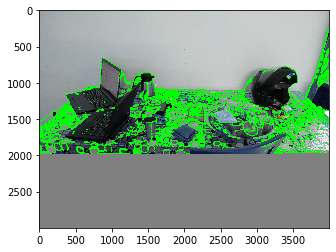

In [74]:
#converting RGB image to Binary 
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE )



with_contours = cv2.drawContours(image,contours,-1,(0,255,0),3) 
plt.imshow(with_contours)

In [0]:
def is_contour_bad(c):
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
	# the contour is 'bad' if it is not a rectangle
	return not len(approx) >4

-1

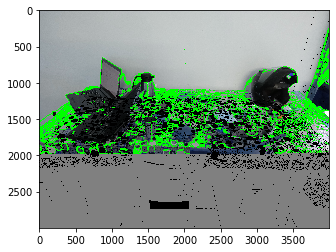

In [83]:
# find contours in the image and initialize the mask that will be
# used to remove the bad contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
mask = np.ones(image.shape[:2], dtype="uint8") * 255
 
# loop over the contours
for c in cnts:
	# if the contour is bad, draw it on the mask
	if is_contour_bad(c):
		cv2.drawContours(mask, [c], -1, 0, -1)
 
# remove the contours from the image and show the resulting images
image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(mask)
plt.imshow(image)
cv2.waitKey(0)

In [0]:
def is_contour_bad(c):
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
	# the contour is 'bad' if it is not a rectangle
	print(len(approx))
